# Task 1 - Conjugate vs. Jeffreys prior

## Example part 1

### Scenario 1
Development of a diagnostic tool that uses patient data to predict the possibility of Type 2 diabetes. The tool uses Bayesian inference to update the probability based on patient characteristics (BMI, blood sugar, ...). The result is simulated there is no real data in this example.

### Steps
1. Define the priors
- Conjugate Prior: 
Assuming a beta distribution for the prior probability of diabetes, given its conjugacy with the binomial likelihood of diabetes occurence. 
- Jeffreys Prior: 
Non-informative prior to assess its influence on the posterior in the absence of strong initial beliefs
2. Likelihood:
- A simple likelihood function based on the binomial distribution, reflecting the number of positive cases in a sample of patients tested
3. Compute Posterior:
- Calculation and comparison of the posterior distributions derived from the conjugate and Jeffreys priors to show how each impacts the updated disease probability after observing new data. 

In [381]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom, norm

In [382]:
def plot_posteriors(alpha_values, beta_values, datasizes, probability=0.15):
    num_rows = len(alpha_values)
    num_cols = len(datasizes)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
                           
    for i, (alpha_input, beta_input) in enumerate(zip(alpha_values, beta_values)):
        for j, n in enumerate(datasizes):
            np.random.seed(73)
            data = binom.rvs(n=n, p=probability, size=1)
            alpha_post = alpha_input + data
            beta_post = beta_input + n - data
            alpha_post_jeffreys = 0.5 + data # always use 0.5 for Jeffreys prior in Beta distribution
            beta_post_jeffreys = 0.5 + n - data # always use 0.5 for Jeffreys prior in Beta distribution

            x = np.linspace(0, 1, 100)
            posterior = beta.pdf(x, alpha_post, beta_post)
            posterior_jeffreys = beta.pdf(x, alpha_post_jeffreys, beta_post_jeffreys)

            if num_rows == 1 and num_cols == 1:
                ax = axs[max(i,j)]
            elif num_rows == 1 or num_cols == 1:
                ax = axs[max(i, j)]
            else:
                ax = axs[i, j]
          
            ax.plot(x, posterior, label=f'Result for Beta α={alpha_input}, β={beta_input}', color='blue')
            ax.plot(x, posterior_jeffreys, label=f'Result for Jeffreys', linestyle='--', color='orange')
            ax.set_title(f'Posterior Distributions for {n} people', fontweight='bold')
            ax.set_xlabel('Probability of Diabetes')
            ax.set_ylabel('Density')
            ax.legend()
    plt.tight_layout()
    plt.show()

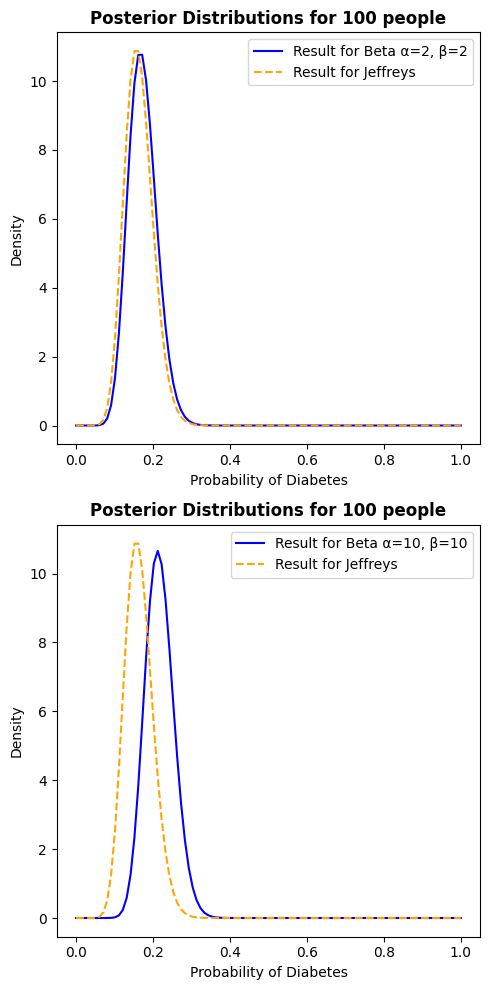

In [383]:
# Sample data
n_patients = 100 # Number of patients tested
n_positive = 0.15 # Number of patients testing positive

plot_posteriors([2, 10], [2, 10], [n_patients], n_positive)

### Interpretation part 1
Both priors calculate almost the same result. 
The Jeffreys prior is just a little more skewed to the left than the Conjugate prior, and a tiny bit more narrow. 
In this case a fairly uniform conjugate prior was choosen alpha = beta = 2 or alpha = beta = 10. For the latter case the difference is larger and the posterior distribution for the conjugate prior alpha = beta = 10 is less skewed to the left.

## Example part 2
Changing alpha and beta would mean, to include more prior information into the model. 
This information might be available through expert knwoledge on the domain, or through previous projects that lead us to certain beliefs.

Assuming this knowledege, different prior combinations are tested on different sized datasets:
* alpha = [2, 5]
* beta =  [2, 1]
* datasize = [10, 500]

The positive cases stays the same = 15%

In [384]:
alpha_values = [2, 5 ]
beta_values = [2, 1]
datasizes = [10, 500]

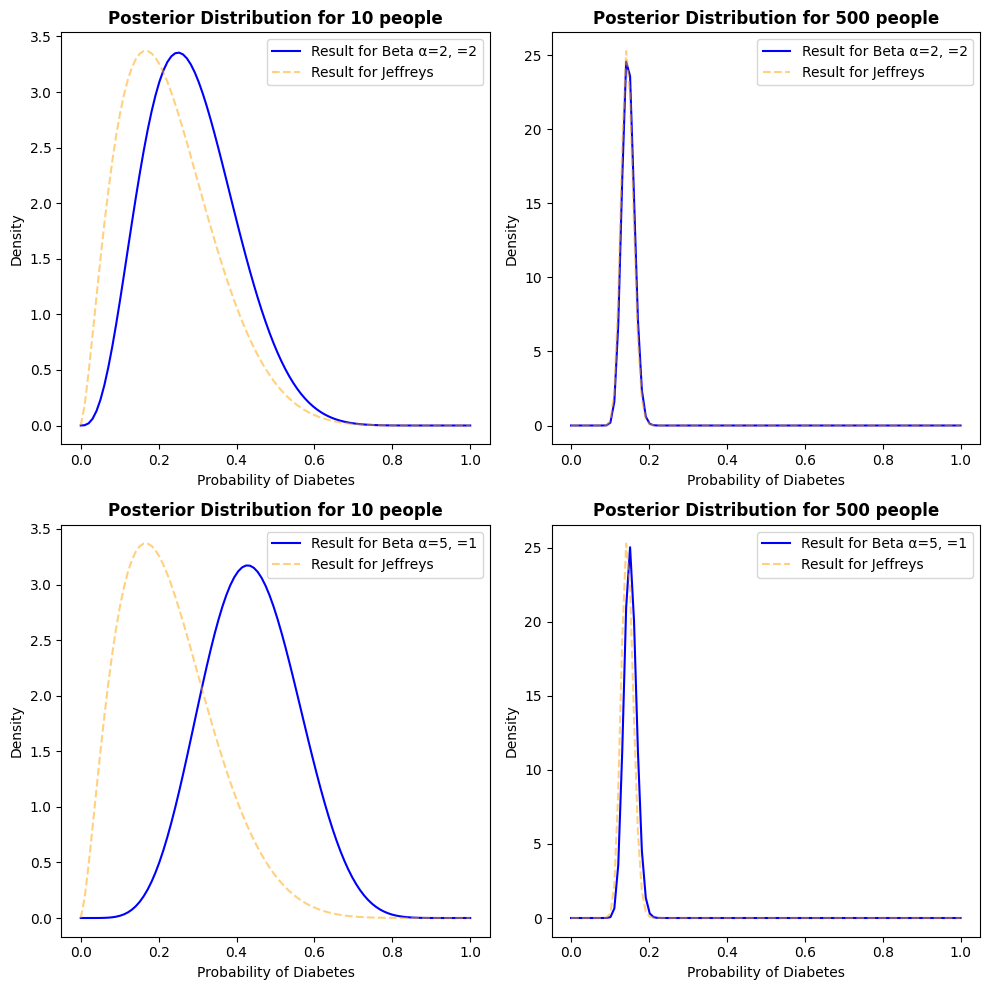

In [385]:
def plot_posteriors(alpha_values, beta_values, datasizes, probability=0.15):
    num_rows = len(alpha_values)
    num_cols = len(datasizes)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
                           
    for i, (alpha_input, beta_input) in enumerate(zip(alpha_values, beta_values)):
        for j, n in enumerate(datasizes):
            np.random.seed(73)
            data = binom.rvs(n=n, p=probability, size=1)
            alpha_post = alpha_input + data
            beta_post = beta_input + n - data
            alpha_post_jeffreys = 0.5 + data
            beta_post_jeffreys = 0.5 + n - data

            x = np.linspace(0, 1, 100)
            posterior = beta.pdf(x, alpha_post, beta_post)
            posterior_jeffreys = beta.pdf(x, alpha_post_jeffreys, beta_post_jeffreys)

            if num_rows == 1 or num_cols == 1:
                ax = axs[max(i,j)]
            else:
                ax = axs[i, j]
          
            ax.plot(x, posterior, label=f'Result for Beta α={alpha_input}, ={beta_input}', color='blue')
            ax.plot(x, posterior_jeffreys, label=f'Result for Jeffreys', linestyle='--', color='orange', alpha=0.5)
            ax.set_title(f'Posterior Distribution for {n} people', fontweight='bold')
            ax.set_xlabel('Probability of Diabetes')
            ax.set_ylabel('Density')
            ax.legend()
    plt.tight_layout()
    plt.show()

plot_posteriors(alpha_values, beta_values, datasizes)

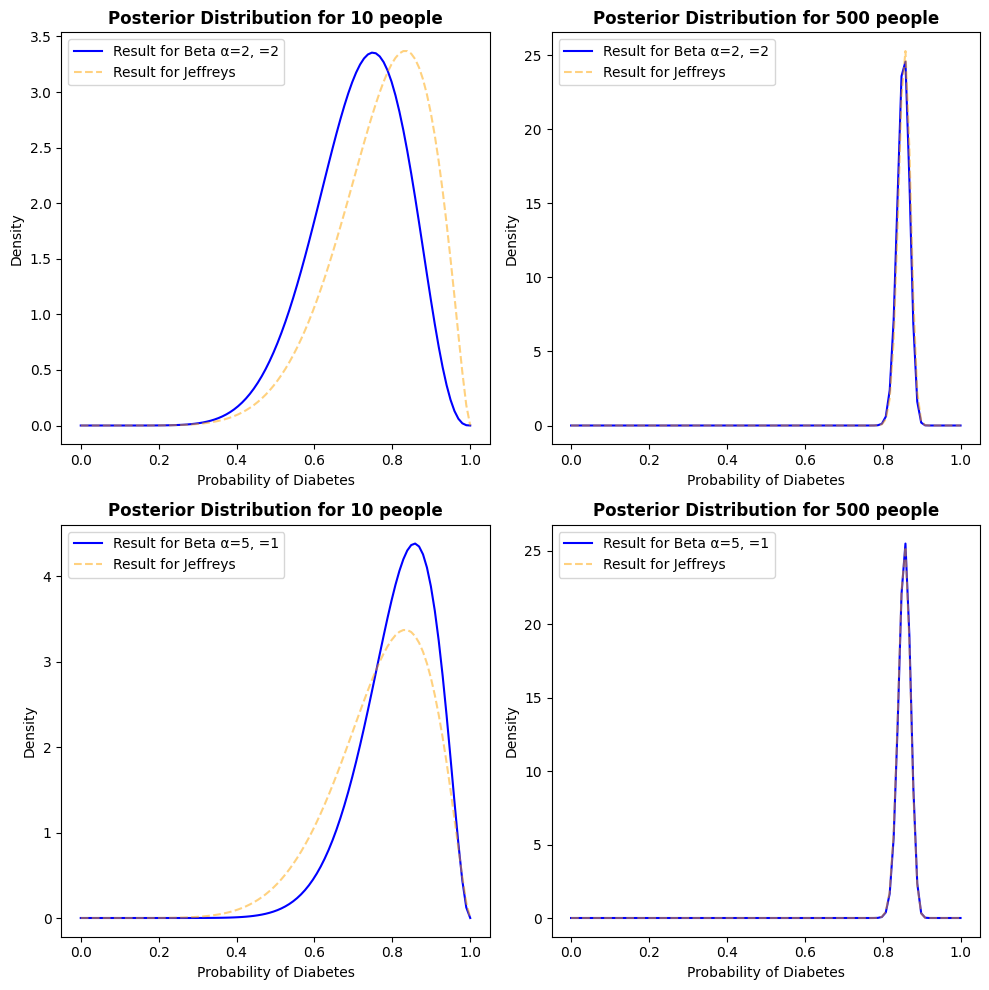

In [386]:
# Changing the true probability to 85% to observe the behavior of the posteriors
plot_posteriors(alpha_values, beta_values, datasizes, probability=0.85)

### Interpretation part 2
* We can observe that the prior plays a larger role when the data is scarce.
* The conjugate prior hinges on the selection of alpha and beta values, a relatively larger alpha moves the distributions peak to the right, while a relatively larger beta moves it to the left.
* A conjugate prior with the same values for alpha and beta but differeing in size will move the distributions peak towards 0.5 with increasing size.
* The Jeffreys prior distribution becomes narrower (more precise) with more datapoints available, 
* Jeffreys prior is able to capture the true data distribution better with few datapoints available than a non informative conjugate prior ( alpha and beta = 2) 

A general conclusion from examples 1 and 2 is that the larger the dataset gets the less important the prior gets (let the data speak for itself). If the dataset is sufficiently large both jeffreys and conjugate prior distributions will calculate the same posterior distribution. 

## Example part 3
### Scenario
This scenario is to examin the effect of a new drug on reducing blood pressure, where the blood pressure readings follow a normal distribution. The variance is known and the goal is to estimate the mean effectiveness.

### Steps
1. Define Conjugate Priors for Beta
2. Define Jeffreys Prior for Beta
3. Visualize resulting postzerior distributions
4. Define Conjugate Priors for Normal
5. Define Jeffreys Prior for Normal
6. Visualize resulting posterior distributions

In [387]:
# Define known variance of blood pressure readings
known_variance = 25 # The variance is 5 squared (just an example)

# Define the true mean effect of the drug (only for simulation purposes)
true_mean_effect = 5

# Simulate the blood pressure readings
np.random.seed(73)
sample_sizes = [10, 100, 500]
sample_data = {n: np.random.normal(true_mean_effect, np.sqrt(known_variance), n) for n in sample_sizes}

In [388]:
# Define prior mean and precision for conjugate normal prior
prior_means = [4, -4, 15]
prior_precisions = [0.2, 0.2, 0.6] # Larger precision means more confidence in the prior

# Define a large variance for the non-informative prior to simulate Jeffreys prior
non_informative_variance = 1e6

In [389]:
def calculate_normal_posterior(sample, prior_mean, prior_precision, known_variance):
    n = len(sample)
    sample_mean = np.mean(sample)

    posterior_precision = prior_precision + n / known_variance
    posterior_mean = (prior_precision * prior_mean + n * sample_mean/ known_variance) / posterior_precision

    posterior_variance = 1 / posterior_precision

    return posterior_mean, posterior_variance

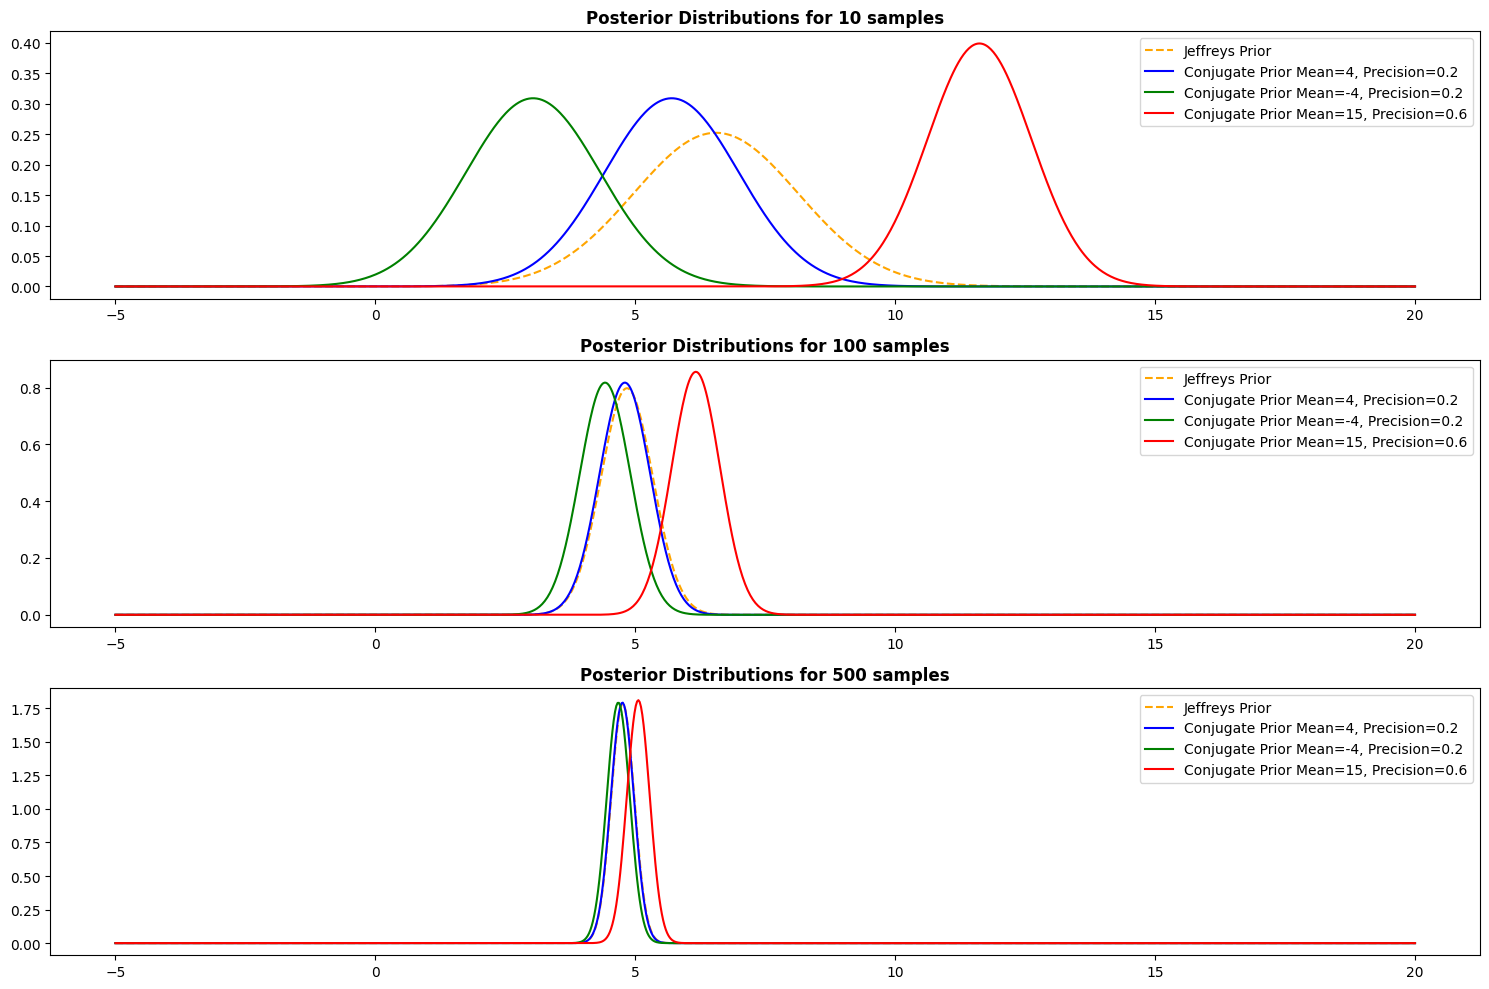

In [390]:
# Plot the results
plt.figure(figsize=(15, 10))
colors = ['blue', 'green', 'red']

for i, n in enumerate(sample_sizes):
    plt.subplot(len(sample_sizes), 1 , i + 1)

    non_info_post_mean, non_info_post_variance = calculate_normal_posterior(sample_data[n], 0, 1/non_informative_variance, known_variance)

    x = np.linspace(-5, 20, 1000)
    plt.plot(x, norm.pdf(x, non_info_post_mean, np.sqrt(non_info_post_variance)), label='Jeffreys Prior', linestyle='--', color='orange')

    for (prior_mean, prior_precision), color in zip(zip(prior_means, prior_precisions), colors):
        post_mean, post_variance = calculate_normal_posterior(sample_data[n], prior_mean, prior_precision, known_variance)

        plt.plot(x, norm.pdf(x, post_mean, np.sqrt(post_variance)), label=f'Conjugate Prior Mean={prior_mean}, Precision={prior_precision}', color=color)
    
    plt.title(f'Posterior Distributions for {n} samples', fontweight='bold')
    plt.legend()

plt.tight_layout()
plt.show()

### Interpretation part 3
* High Precision Conjugate -> High confidence in the prior knowledge.
 The prior knowledge plays a larger role in the posterior calculation. If the prior knwoledge (mean) is selected based on sound knowledge the posterior distribution will be calculated well even with only a few datapoints available. If the prior knowledge is choosen poorly it will negatively affect the calculated posterior distribution and might be far off from the true distribution.
* Low Precision Conjugate -> Low confidence in prior knowledge, the data will play a larger role and a poorly choosen prior will converge on the true posterior distribution with a fair amount of data. 
* Jeffreys (not true in this example only simulated) -> Converges fast and even grasps the data well on small datasets. However, the uncertainty is fairly large on small datasets.

- As the sample size increases the influence of the prior decreases
- A high precision prior converges to an accurate estimate more quickly than a low precision prior, but only if the prior mean is close to the true mean
- The choice of the prior should be based on how confident we are in the prior information and its accuracy.

## Sources
This is a list of all sources, besides the coursebook, used to develop the example and the corresponding Advanced Workbook.

